## Project Hollowgraph

In [1]:
%matplotlib inline
import math
import pandas as pd
import matplotlib.pyplot as plt
import csv
import mpld3

#mpld3.enable_notebook()
plt.style.use('dark_background')

This notebook is meant to be used on data collected using ard_code_1

In [2]:
data_path = "../../data/ard_code_1_data/full.csv" # insert csv path
out_csv = "../../data/data1.csv" # output csv

Format of the data:
* The servo sweeps a 180 degree arc taking a reading at an interval of 1 degree
* Each row in the csv corresponds to readings at a specific angle, therefore, number of columns is the number of observations
* Also, since the sensor takes a total of 181 readings, number of rows is 181

In [3]:
df = pd.read_csv(data_path)
df = df.iloc[182:363]
col_count = len(df.columns)
col_names = [f"{i}" for i in range(0, col_count)]
df.columns = col_names
df.drop(str(col_count-1), axis=1, inplace=True)
df = df.T
col_count = len(df.columns)
col_names = [f"{i}_deg" for i in range(0, 181)]
df.columns = col_names
df.head()
# this cell transposes the dataframe and adds column names for ease of use

,0_deg,1_deg,2_deg,3_deg,4_deg,5_deg,6_deg,7_deg,8_deg,9_deg,...,171_deg,172_deg,173_deg,174_deg,175_deg,176_deg,177_deg,178_deg,179_deg,180_deg
0,3.2,3.0,3.1,3.1,3.2,3.1,3.2,3.2,3.1,3.6,...,3.1,2.6,2.5,3.1,2.7,2.7,2.7,2.7,2.7,2.7
1,3.1,3.1,3.0,3.2,3.1,3.2,3.1,3.2,3.2,3.6,...,3.1,3.1,2.6,2.9,2.7,3.0,2.7,2.7,2.7,2.7
2,3.2,3.0,3.1,3.1,3.1,3.1,3.2,3.2,3.2,3.6,...,3.1,2.9,2.6,3.1,2.6,2.8,3.1,2.7,2.6,2.7
3,3.1,3.2,3.0,3.2,3.2,3.2,3.1,3.2,3.6,3.6,...,2.6,2.6,2.6,3.0,2.7,3.0,3.1,2.7,2.7,2.7
4,3.2,3.0,3.1,3.2,3.2,3.5,3.2,3.2,3.6,3.5,...,2.7,2.5,2.6,3.1,3.0,3.0,2.7,2.7,2.6,2.7


In [4]:
# utiliy function to draw a single section
def draw(a, line=False): # a is data of one sweep
    x, y, s = [], [], []
    marker_size = 1
    for i in range(0, len(a)):
        s.append(marker_size)
        angle = math.pi - i*(math.pi/len(a))
        x.append(a[i] * math.cos(angle))
        y.append(a[i] * math.sin(angle))
    plt.scatter(x, y, s=s)
    if line:
        plt.plot(x, y)

In [5]:
# utility function to transform a dataframe row to a list
def pdrow_to_list(dfr):
    ret = []
    for i in range(0, 180):
        ret.append(float(dfr[f'{i}_deg']))
    return ret

The section below plots the standard deviation for data points in each angle. This gives us a few very interesting observations.

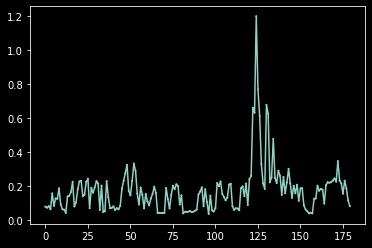

In [6]:
a = pdrow_to_list(df.std())
x, y, s = [], [], []
for i in range(0, len(a)):
    s.append(1)
    x.append(i)
    y.append(a[i])
plt.scatter(x, y, s=s)
plt.plot(x, y)

There is a huge spike near the 50-60 degree mark, this is due to the fact that the sensor encounters a vertex which causes an increase in stray echoes resulting in erroneous readings. This is also observed at around 40-60 and 120-140 degrees in other cuboid readings (due to vertices). We also see that the deviation is relatively small compared to data taken with a higher LIMIT value in arduino code. This is becuause a lower LIMIT causes the sensor to momentarily halt readings if the environment is concentrated with stray echoes.

The bottom cell is for studying readings/(each row) individually

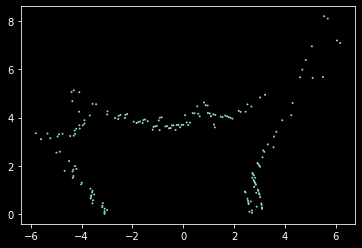

In [7]:
reading = 31

a = pdrow_to_list(df.iloc[reading:reading+1])
draw(a)

The cell below is for studying the distribution of readings for each spot at a specific angle/(each column)

<AxesSubplot: >

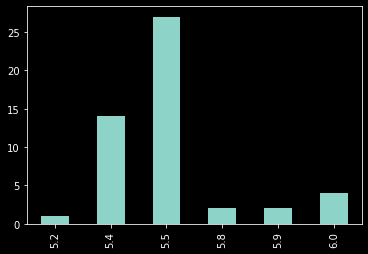

In [8]:
angle = '45_deg'

fig, ax = plt.subplots()
df[angle].value_counts().sort_index().plot(ax=ax, kind="bar")

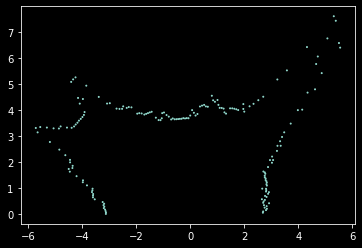

In [9]:
mean = df.mean()
mean_data = pdrow_to_list(mean)
draw(mean_data)

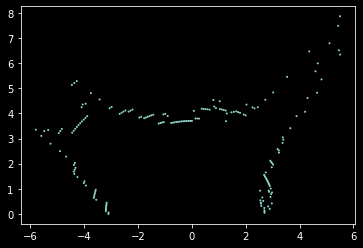

In [10]:
median = df.median()
median_data = pdrow_to_list(median)
draw(median_data)

In the above two cells, we experiment with mean and median as potential measures of central tendency. Both seem to be a good enough fit with very little trade-off at the present scale. But median seems to be a more accurate measure becuase of the high variance (with outliers) observed at times.

Increasing the LIMIT in ard_code_1 gives us more data to work with which increases accuracy but becuase of the nature of the sensor, at points, it also decreases accuracy by populating table with several consecutive erroneous data points. This can be overcome by carefully increasing OBSERVATIONS in ard_code_1.

Although with more data from more sensitive sensors, we will get better results, the sanitisation will not be this straightforward. 
Further work is to be done in exploring clutering in data points at specific angles. Centroids from these clusters might be a good candidate as an estimate, but this can be employed only on data with higher accuracy from better sensors.

In [11]:
with open(out_csv, 'a') as file:
    writer_object = csv.writer(file)
    writer_object.writerow(median_data)
    file.close()

Above cell can be used to append final data of a arc to the bigger collection of arcs which is used by the renderer to generate a 3d render. For the renderer to be able to access this, a server has to be started in the repo root at localhost:5500.

In [12]:
def draw_cluster(a, angle):
    x, y, s = [], [], []
    marker_size = 1
    for i in range(0, len(a)):
        s.append(marker_size)
        x.append(a[i] * math.cos(angle))
        y.append(a[i] * math.sin(angle))
    plt.scatter(x, y, s=s)

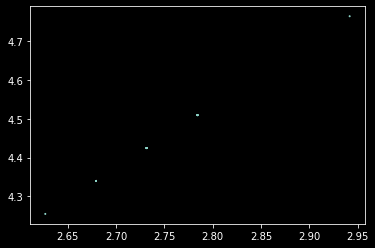

In [13]:
draw_cluster(df['55_deg'], 45)